## OPEN CV (resizing,crop,noise)
##### 목표: CNN 모델이 더 잘 학습할 수 있도록 이미지를 최적화

In [1]:
pip show opencv-python

Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install opencv-python

### 1️⃣ 이미지 크기 조정(resize)

In [2]:
import cv2

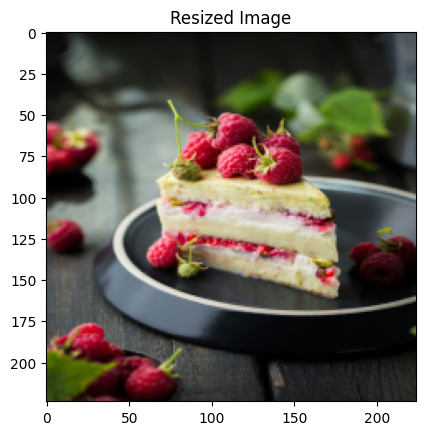

In [4]:
import matplotlib.pyplot as plt

img =cv2.imread("anna-tukhfatullina-food-photographer-stylist-Mzy-OjtCI70-unsplash.jpg")

# interpolation=cv2.INTER_AREA는 이미지를 줄일 때(다운샘플링)에 최적화된 방법
# 이미지 품질을 유지하면서 크기를 줄이고 싶다면 INTER_AREA 사용
# 여러 픽셀을 평균 내서 부드럽게 축소

resized_img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)


plt.imshow(cv2.cvtColor(resized_img,cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()


### 2️⃣ 이미지 크롭(Crop) & 중심정렬
##### 이미지에서 불필요한 배경 제거 & CNN이 음식에 집중할 수 있도록 정렬

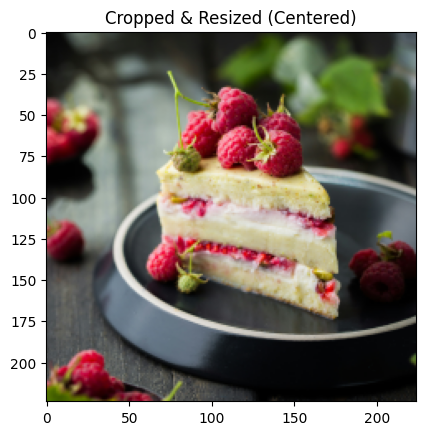

In [6]:
import numpy as np

# 이미지 중심 크롭 (224x224)
# 이미지 크기 확인 & 정사각형 크롭 준비
h,w,_ = img.shape
crop_size = min(h,w) #  높이와 너비 중 더 작은 값을 선택해서 정사각형 크기를 결정

# 정사각형 크롭
start_x = (w - crop_size)//2
start_y = (h - crop_size)//2
cropped_img = img[start_y:start_y+crop_size, start_x:start_x+crop_size]

# CNN 학습을 위해 다시 224x224로 조정
final_img = cv2.resize(cropped_img, (224, 224), interpolation=cv2.INTER_AREA)

# 결과 출력
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title("Cropped & Resized (Centered)")
plt.show()

### 3️⃣ 이미지 선명도 & 노이즈 제거

In [ ]:
# 노이즈 제거(Gaussian blur)
# 노이즈가 많으면 이미지가 깨끗하지 않아서 엣지(경계)를 찾을 때 방해됨
blurred_img = cv2.GaussianBlur(img, (3, 3), 0)

In [27]:
# 이미지 선명하게 (Laplacian 필터)
# 이 필터는 이미지의 경계를 강조하고, 흐릿한 이미지를 선명하게 만들 때 많이 사용됨

sharp_img = cv2.Laplacian(blurred_img,cv2.CV_64F,ksize=7)
# CV_64F :  음수 값도 유지 가능

In [28]:
# 음수값을 절대값으로 변형(Uint8로 변경) > OpenCV에서 사용 가능
sharp_img = cv2.convertScaleAbs(sharp_img)

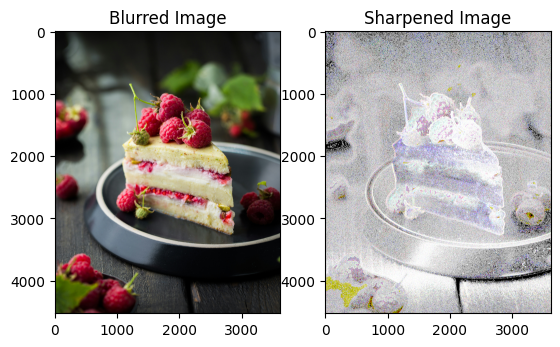

In [29]:
# 결과 출력

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")

plt.show()